# TALL BUILDINGS ARE HARDER TO HEAT UP
And two other amazing facts about the UCI Energy Efficiency Data Set 

#### Data Science 410 BB
#### University of Washington Professional & Continuing Education

#### Homework 1: Univatirate Visualzation & Summary Statstical Methods
#### Leo Salemann, 1/10/18


## Introduction
This Jupyter Notebook (running the R kernel) will explore the [Energy Efficiency Data Set](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). With a few basic analysis techniques, one can quickly find ....

1) The data's clean, almost too clean ... we're talking synthetic.

2) Heating Load clusters around two values. 

3) Heating Load appears to be strongly influenced by roof area and overall height, which also cluster around two values.

## Unnaturally Clean - The telltalle signs of simulation.
Okay, [the dataset description on the UCI site](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency) is very upfront about stating that this is a simulated dataset.  That said, it's instrucive to look for clues in the data itself, to make one better equipped to detect simulated data when it's undocumented.

The first clue comes from an initial glance at the structure. No stray values in any of the numerics, lots of repeat values.  Either the team in charge of data extraction/prep did an equisite job, or this data came out of a machine.

In [179]:
read.energy = function(file = 'EnergyEfficiencyData.csv'){
  ## Read the csv file
  bldg.energy <- read.csv(file, header = TRUE, 
                      stringsAsFactors = FALSE)
}

bldg.energy = read.energy()
str(bldg.energy)

'data.frame':	768 obs. of  10 variables:
 $ Relative.Compactness     : num  0.98 0.98 0.98 0.98 0.9 0.9 0.9 0.9 0.86 0.86 ...
 $ Surface.Area             : num  514 514 514 514 564 ...
 $ Wall.Area                : num  294 294 294 294 318 ...
 $ Roof.Area                : num  110 110 110 110 122 ...
 $ Overall.Height           : num  7 7 7 7 7 7 7 7 7 7 ...
 $ Orientation              : int  2 3 4 5 2 3 4 5 2 3 ...
 $ Glazing.Area             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Glazing.Area.Distribution: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Heating.Load             : num  15.6 15.6 15.6 15.6 20.8 ...
 $ Cooling.Load             : num  21.3 21.3 21.3 21.3 28.3 ...


Staying in "text mode", you run some Frequency Tables to look for natual variation.

In [181]:
table(bldg.energy$Relative.Compactness)


0.62 0.64 0.66 0.69 0.71 0.74 0.76 0.79 0.82 0.86  0.9 0.98 
  64   64   64   64   64   64   64   64   64   64   64   64 

In [182]:
table(bldg.energy$Overall.Height)


3.5   7 
384 384 

In [183]:
table(bldg.energy$Orientation)


  2   3   4   5 
192 192 192 192 

In [184]:
table(bldg.energy$Glazing.Area, 
      bldg.energy$Glazing.Area.Distribution)

      
        0  1  2  3  4  5
  0    48  0  0  0  0  0
  0.1   0 48 48 48 48 48
  0.25  0 48 48 48 48 48
  0.4   0 48 48 48 48 48

Uniform distribution of just a few possible vlaues, either the data's simulated, or there was some very heavy cherry-picking going on when sampling a natrual poppulation.

To really see what's going on, it's handy to look at everything. A scatterplot matrix, with correlation values in the upper-right and  histrograms down the middle shows a few potentially linear relationships, some spatial clustering, but a robotically-perfiec spread of Orientation, Glazing Area, and Glazing Area Distribution.

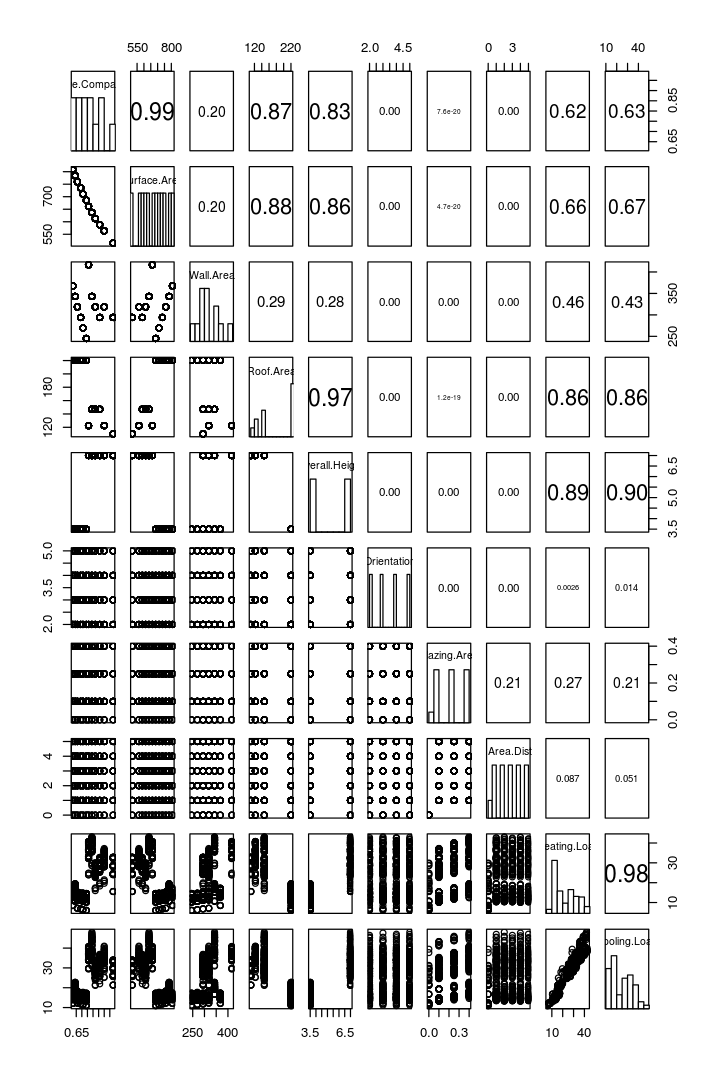

In [187]:
panel.hist = function(x, ...){
  usr = par('usr')
  on.exit(par(usr))
  par(usr = c(usr[1:2], 0, 1.5))
  h = hist(x, plot=FALSE)
  breaks = h$breaks
  nB = length(breaks)
  y=h$counts
  y=y/max(y)
  rect(breaks[-nB], 0, breaks[-1], y, col='white')
}

panel.cor = function(x, y, digits=2, prefix="", cex.cor, ...){
  usr = par("usr")
  on.exit(par(usr))
  par(usr = c(0,1,0,1))
  r = abs(cor(x,y,use='complete.obs'))
  txt=format(c(r,0.123456789),digits=digits)[1]
  txt=paste(prefix,txt,sep='')
  if(missing(cex.cor)) cex.cor = 0.8/strwidth(txt)
  text(0.5, 0.5, txt, cex = cex.cor*(1+r)/2)
}

pairs(bldg.energy[,0:10], 
      diag.panel = panel.hist,
      upper.panel = panel.cor)

Code based on [Scatterplot matrices with ggplot](https://gastonsanchez.wordpress.com/2012/08/27/scatterplot-matrices-with-ggplot/) by [Gaston Scanchez](http://www.gastonsanchez.com/) in [Data Anaysis Visually Enforced](https://gastonsanchez.wordpress.com/)

Histogram diagonals & correlation from [R Graphics Cookbook](https://rstudio-pubs-static.s3.amazonaws.com/86962_975473a9afe44d03832f9a65bc1a39c2.html)

## Thirteen or Thirty: A Tale of Two Humps in the Heating Load
Taken as a whole, most of the 750 builidings have a heating load of about 13 or 30, with more variation around the 30. A simple density plot makes this clear (below)

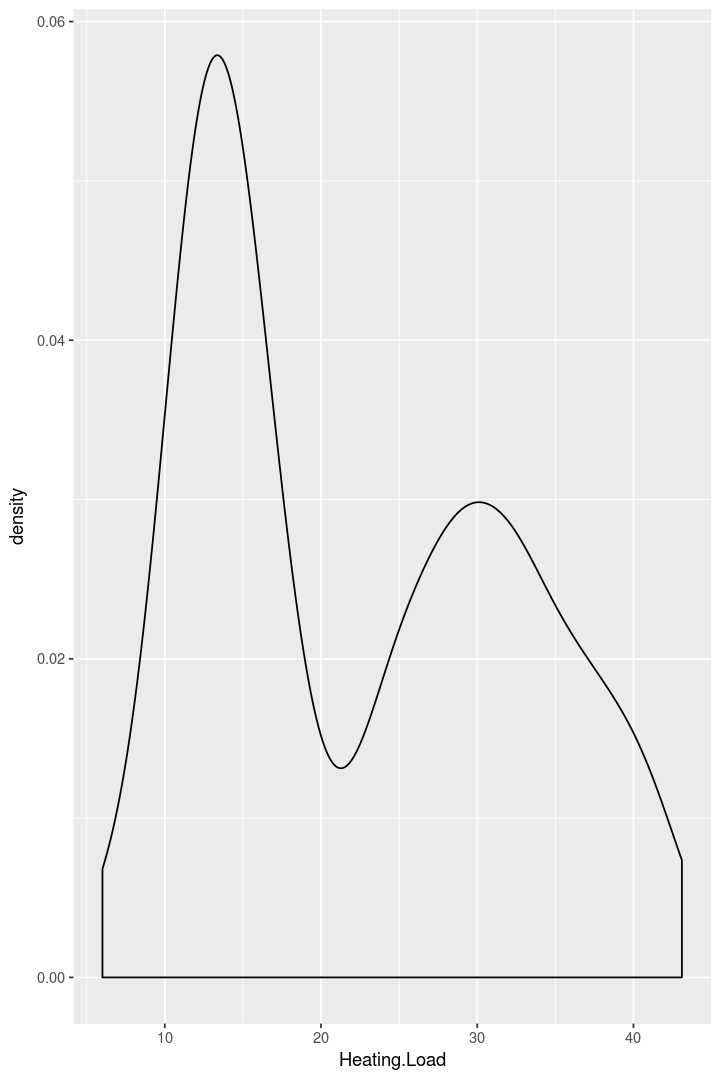

In [188]:
read.energy = function(file = 'EnergyEfficiencyData.csv'){
  ## Read the csv file
  bldg.energy <- read.csv(file, header = TRUE, 
                      stringsAsFactors = FALSE)

 
  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  # bldg.energy[complete.cases(bldg.energy), ]
}

ggplot(bldg.energy, aes(Heating.Load)) + geom_density()

What's not clear, is whether this is 13 vs. 30 [Kilowatts, BTUs, or some multiple thereof](http://www.tombling.com/cooling/heat-load-calculations.htm). Even the [technical paper](http://people.maths.ox.ac.uk/tsanas/Preprints/ENB2012.pdf) associated with the [dataset](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency#) doesn't deign to delve into real-world units of measure. But we have our two humps.

## Correlations & Clusters: Finding the Two-Hump Culprit
We'll start by pruning out the uniformly distributed vlaues, focusing on those that exhibit more interesting clustering behaviors. The prvious pairs plot revealed a two-column histogram for Overal.Height, so we'll use that for coloring.

In [193]:
bldg.compact = bldg.energy[, c('Relative.Compactness', 
                               'Wall.Area','Roof.Area', 
                               'Overall.Height', 
                               'Heating.Load')]

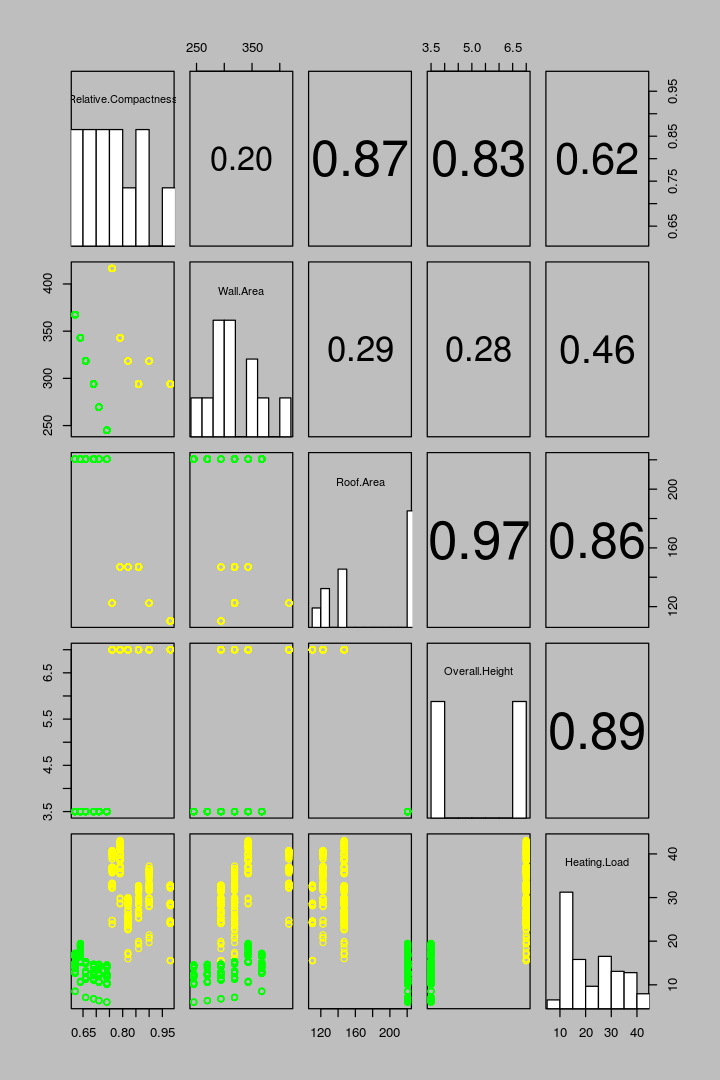

In [195]:
par(bg="gray")

cols2 <- character(nrow(bldg.energy))
cols2[] <- "black"
cols2[bldg.energy$Overall.Height == 3.5] <- "green"
cols2[bldg.energy$Overall.Height == 7] <- "yellow"

pairs(bldg.compact[,], 
      col=cols2, 
      diag.panel = panel.hist,
      upper.panel = panel.cor)

Background color from [pakt](https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781849513067/2/ch02lvl1sec03/setting-plot-background-colors); Dot color form [stack overflow](https://stackoverflow.com/questions/15599717/coloring-points-in-a-pairs-plot)

## Peeling the Onion: Fnding two humps (and a half)
So now we can see how multiple variables separate cleanly on overall height. We're going to skip a few of the strongly-correlated variables, and see what we can tease out of one of the more "cloudy" scatter plots.  As with the matrix plot, coloring by overall height shows strong separation of heating load by ehight. Density contours demonstrate how the taller buidligns actually separte into two "nodes" centered at 30 and 38, respectively. Sizing by Glazing area shows the strong positive correlation between more glass and a higher heating load.

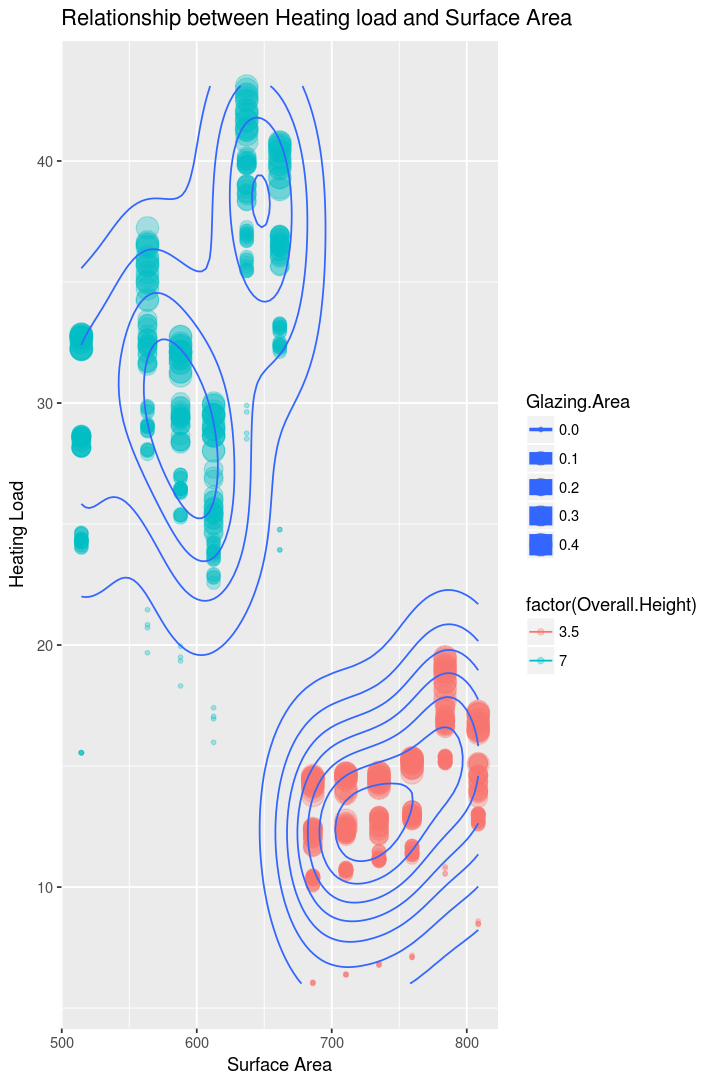

In [196]:
ggplot(bldg.energy, aes(x = Surface.Area, 
           y = Heating.Load,))+ 
geom_point(aes(color = factor(Overall.Height),
               size = Glazing.Area),
               alpha = 0.3) + 
geom_density2d() +
xlab('Surface Area') + 
ylab('Heating Load') + 
ggtitle('Relationship between Heating load and Surface Area')

## Okay, so Now What? (i.e. Conclusion)
The Building Energy Dataset exhibits a "two hump" distribution of heating and load. It's the output of a simulation which did a dutiful "sweep" of mulitiple evenly distributed values for surface area, orientation, and glazing area in an orderly manner. It may be wortwhile to run the simulaiton again, with a simlar "sweep" of multiple building heights and roof areas. 

In [ ]:
#  =====================================================================================

## Peeling the Onion: Fnding two humps (and a half)
We're going to skip a few of the strongly-correlated variables, and see what we can tease out of one of the more "cloudy" scatter plots.  As with the matrix plot, coloring by overall height shows strong separation of heating load by ehight. Density contours demonstrate how the taller buidligns actually separte into two "nodes" centered at 30 and 38, repesctivvely. Sizing by Glazing area shows the strong positive correlation between glass added and heating load. 

# --------------< JUNK >------------------


It's also worth mentioning the rigid regularity of Orientation, Glazing Area and Glazing Area Distribution. It's unlikely this dataset came form field observations, unless the team was extremely selective about which buildings they picked (and yet manaaged come up with over 700 of them). A quick read at the [technical paper's abstract](http://www.sciencedirect.com/science/article/pii/S037877881200151X) confirms the data was generated by a simulation.

The quickest way to find something is to look at everything at once. A scatterplot matrix, with correlation values in the upper-right, histrograms down the middle, and color based on Overall Height, shows Roof Area and Overall Height as the two variables most strongly correlated to heating load. The coloring and clustering of of the scatterplot ponts, as well at the shape of the histograms, suggest possible sources or the "two-hump" phenomenan. 

# OTHER STUFF

## Correlation from table

In [160]:
cor(bldg.energy)

,Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution,Heating.Load,Cooling.Load
Relative.Compactness,1.000000e+00,-9.919015e-01,-0.2037817,-8.688234e-01,0.8277473,0.000000000,7.617400e-20,0.00000000,0.622272179,0.63433907
Surface.Area,-9.919015e-01,1.000000e+00,0.1955016,8.807195e-01,-0.8581477,0.000000000,4.664140e-20,0.00000000,-0.658120227,-0.67299893
Wall.Area,-2.037817e-01,1.955016e-01,1.0000000,-2.923165e-01,0.2809757,0.000000000,0.000000e+00,0.00000000,0.455671157,0.42711700
Roof.Area,-8.688234e-01,8.807195e-01,-0.2923165,1.000000e+00,-0.9725122,0.000000000,-1.197187e-19,0.00000000,-0.861828253,-0.86254660
Overall.Height,8.277473e-01,-8.581477e-01,0.2809757,-9.725122e-01,1.0000000,0.000000000,0.000000e+00,0.00000000,0.889430674,0.89578517
Orientation,0.000000e+00,0.000000e+00,0.0000000,0.000000e+00,0.0000000,1.000000000,0.000000e+00,0.00000000,-0.002586534,0.01428960
Glazing.Area,7.617400e-20,4.664140e-20,0.0000000,-1.197187e-19,0.0000000,0.000000000,1.000000e+00,0.21296422,0.269840996,0.20750499
Glazing.Area.Distribution,0.000000e+00,0.000000e+00,0.0000000,0.000000e+00,0.0000000,0.000000000,2.129642e-01,1.00000000,0.087367594,0.05052512
Heating.Load,6.222722e-01,-6.581202e-01,0.4556712,-8.618283e-01,0.8894307,-0.002586534,2.698410e-01,0.08736759,1.000000000,0.97586181
Cooling.Load,6.343391e-01,-6.729989e-01,0.4271170,-8.625466e-01,0.8957852,0.014289598,2.075050e-01,0.05052512,0.975861813,1.00000000


In [175]:
 bldg.compact = bldg.energy[, c('Roof.Area',
                                'Overall.Height',
                                'Heating.Load')]

In [176]:
cor (bldg.compact)

,Roof.Area,Overall.Height,Heating.Load
Roof.Area,1.0000000,-0.9725122,-0.8618283
Overall.Height,-0.9725122,1.0000000,0.8894307
Heating.Load,-0.8618283,0.8894307,1.0000000


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


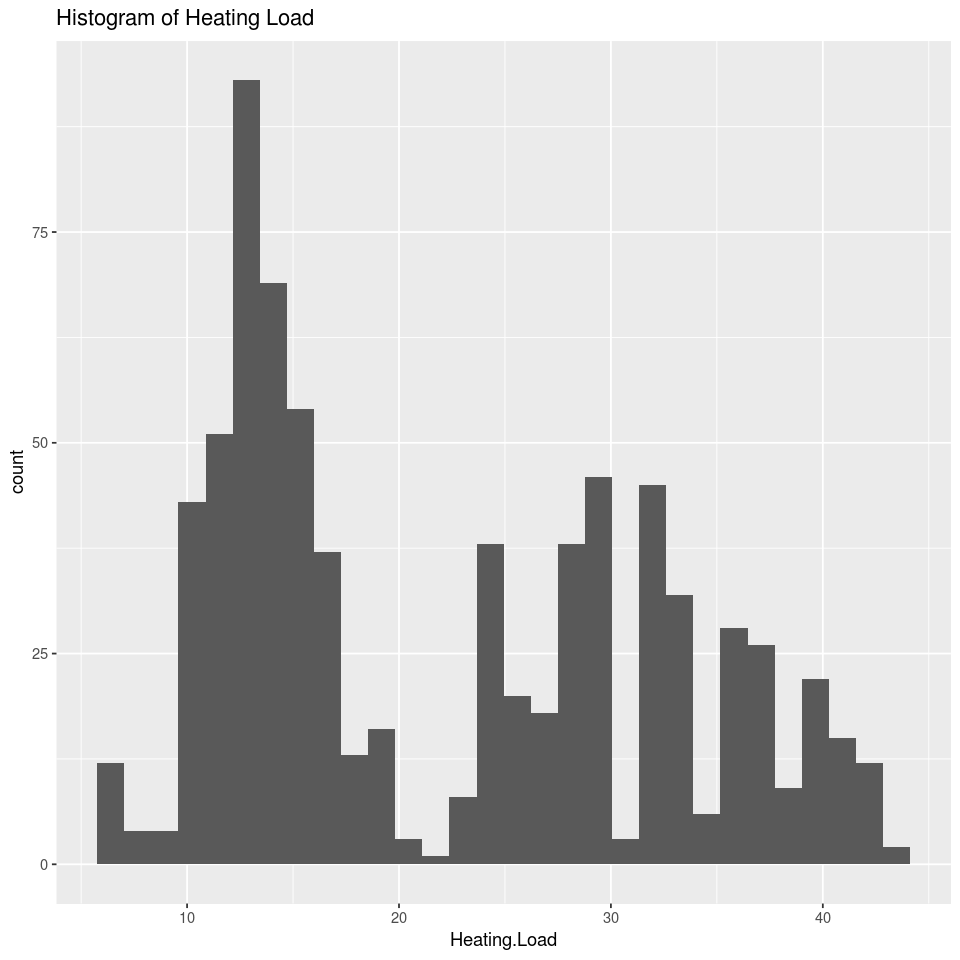

In [165]:
require(ggplot2)
ggplot(bldg.energy, aes(Heating.Load)) + ## Specify the data frame and columns. Note the + chain operator
     geom_histogram() + ## Fuction for the plot type 
     ggtitle('Histogram of Heating Load')

In [168]:
options(repr.plot.width=6, repr.plot.height=6)
bw1 = (max(bldg.energy$price) - min(auto.price$price))/20
bw2 = (max(auto.price$price) - min(auto.price$price))/50
require(gridExtra)
p1 = ggplot(bldg.energy, aes(Heating.Load)) + geom_histogram(binwidth = bw1) + 
        ggtitle('Histogram of Heating Load with 20 bins')
p2 = ggplot(bldg.energy, aes(Surface.Area)) + geom_histogram(binwidth = bw1) + 
        ggtitle('Histogram of Surface Area with 20 bins')
p3 = ggplot(bldg.energy, aes(Roof.Area)) + geom_histogram(binwidth = bw1) + 
        ggtitle('Histogram of Roof Area with 20 bins')
p4 = ggplot(bldg.energy, aes(Overall.Height)) + geom_histogram(binwidth = bw1) + 
        ggtitle('Histogram of Overall Height with 20 bins')
grid.arrange(p1, p2, p3, p4, nrow = 4)

Warning message in max(bldg.energy$price):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in eval(expr, envir, enclos): object 'auto.price' not found


In [177]:
options(repr.plot.width=6, repr.plot.height=6)
bw1 = (max(bldg.energy$price) - min(auto.price$price))/20
bw2 = (max(auto.price$price) - min(auto.price$price))/50
require(gridExtra)
p1 = ggplot(bldg.energy, aes(Heating.Load)) + geom_histogram(binwidth = bw1) + 
        ggtitle('Histogram of Heating Load with 20 bins')
p3 = ggplot(bldg.energy, aes(Roof.Area)) + geom_histogram(binwidth = bw1) + 
        ggtitle('Histogram of Roof Area with 20 bins')
p4 = ggplot(bldg.energy, aes(Overall.Height)) + geom_histogram(binwidth = bw1) + 
        ggtitle('Histogram of Overall Height with 20 bins')
grid.arrange(p1, p3, p4, nrow = 3)

Warning message in max(bldg.energy$price):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in eval(expr, envir, enclos): object 'auto.price' not found


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


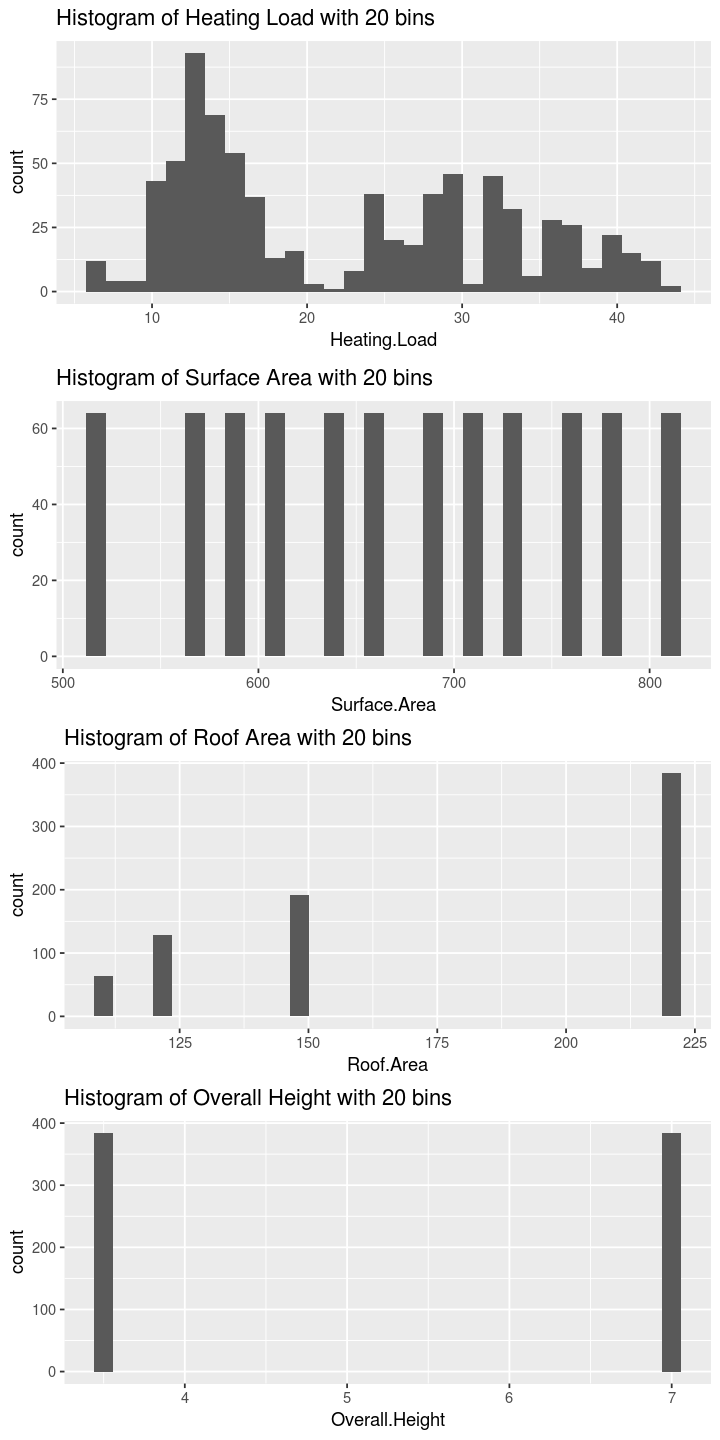

In [172]:
options(repr.plot.width=6, repr.plot.height=12)

require(gridExtra)
p1 = ggplot(bldg.energy, aes(Heating.Load)) + geom_histogram() + 
        ggtitle('Histogram of Heating Load with 20 bins')
p2 = ggplot(bldg.energy, aes(Surface.Area)) + geom_histogram() + 
        ggtitle('Histogram of Surface Area with 20 bins')
p3 = ggplot(bldg.energy, aes(Roof.Area)) + geom_histogram() + 
        ggtitle('Histogram of Roof Area with 20 bins')
p4 = ggplot(bldg.energy, aes(Overall.Height)) + geom_histogram() + 
        ggtitle('Histogram of Overall Height with 20 bins')
grid.arrange(p1, p2, p3, p4, nrow = 4)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


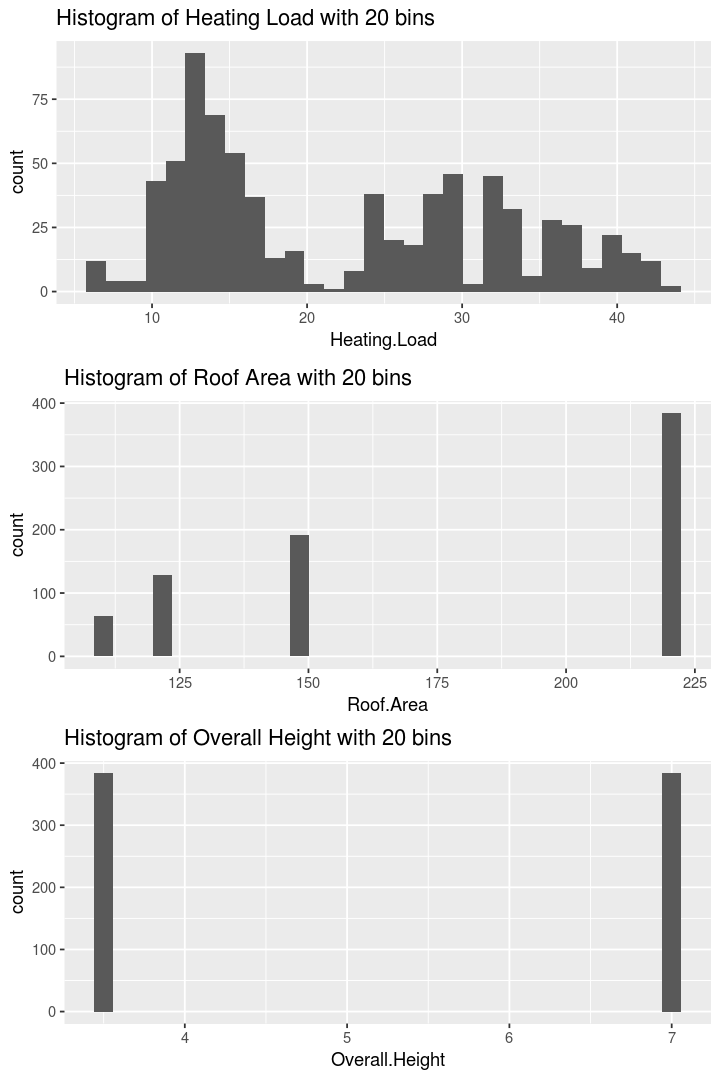

In [178]:
options(repr.plot.width=6, repr.plot.height=9)

require(gridExtra)
p1 = ggplot(bldg.energy, aes(Heating.Load)) + geom_histogram() + 
        ggtitle('Histogram of Heating Load with 20 bins')
p3 = ggplot(bldg.energy, aes(Roof.Area)) + geom_histogram() + 
        ggtitle('Histogram of Roof Area with 20 bins')
p4 = ggplot(bldg.energy, aes(Overall.Height)) + geom_histogram() + 
        ggtitle('Histogram of Overall Height with 20 bins')
grid.arrange(p1, p3, p4, nrow = 3)